<a href="https://colab.research.google.com/github/JanLeyva/TFM/blob/main/inpainting_demo_hm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## Inpainting - mmediting

In [2]:
pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 1.4 MB/s eta 0:14:44tcmalloc: large alloc 1147494400 bytes == 0x39a6e000 @  0x7f1ce2248615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.3 MB/s eta 0:12:22tcmalloc: large alloc 1434370048 bytes == 0x7e0c4000 @  0x7f1ce2248615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████████           | 1336.2 MB 1.2 MB/s eta 0:09:35tcmalloc: large alloc 1792966656 bytes =

In [3]:
!git clone https://github.com/HimariO/mmediting-meme.git

Cloning into 'mmediting-meme'...
remote: Enumerating objects: 4702, done.
remote: Total 4702 (delta 0), reused 0 (delta 0), pack-reused 4702
Receiving objects: 100% (4702/4702), 3.59 MiB | 28.91 MiB/s, done.
Resolving deltas: 100% (3245/3245), done.


In [21]:
import os
os.chdir("/content/mmediting-meme")

In [22]:
!pip install -r requirements.txt

  Using cached codecov-2.1.12-py2.py3-none-any.whl (16 kB)
  Using cached flake8-4.0.1-py2.py3-none-any.whl (64 kB)
  Using cached interrogate-1.5.0-py3-none-any.whl (45 kB)
  Using cached isort-4.3.21-py2.py3-none-any.whl (42 kB)
  Using cached pytest_runner-6.0.0-py3-none-any.whl (7.2 kB)
  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)
  Using cached pycodestyle-2.8.0-py2.py3-none-any.whl (42 kB)
  Using cached pyflakes-2.4.0-py2.py3-none-any.whl (69 kB)
  Using cached importlib_metadata-4.2.0-py3-none-any.whl (16 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [6]:
!pip install -v -e .  # or "python setup.py develop"

Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
user = False
home

## Download pre-trained model

In [7]:
os.chdir("/content")

In [8]:
!mkdir pretrain_model

In [9]:
os.chdir("/content/pretrain_model")

In [10]:
!wget https://download.openmmlab.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth

--2022-05-08 21:10:06--  https://download.openmmlab.com/mmediting/inpainting/deepfillv2/deepfillv2_256x256_8x2_places_20200619-10d15793.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41573144 (40M) [application/octet-stream]
Saving to: ‘deepfillv2_256x256_8x2_places_20200619-10d15793.pth’

deepfillv2_256x256_ 100%[===================>]  39.65M  11.9MB/s    in 3.3s    

2022-05-08 21:10:10 (11.9 MB/s) - ‘deepfillv2_256x256_8x2_places_20200619-10d15793.pth’ saved [41573144/41573144]



In [11]:
os.chdir("/content")

In [12]:
!mkdir img_clean

In [14]:
!mkdir data

## Download images

In [15]:
os.chdir("/content/data")

In [16]:
%%time 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

--2022-05-08 21:10:31--  https://docs.google.com/uc?export=download&confirm=t&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3
Resolving docs.google.com (docs.google.com)... 172.253.117.113, 172.253.117.102, 172.253.117.138, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bbopnmfdt3di7jduure6tv5qoi1apid8/1652044200000/01761641334275034120/*/1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3?e=download [following]
--2022-05-08 21:10:31--  https://doc-14-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bbopnmfdt3di7jduure6tv5qoi1apid8/1652044200000/01761641334275034120/*/1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3?e=download
Resolving doc-14-44-docs.googleusercontent.com (doc-14-44-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c09::84
Connecting to doc-14-44-docs.googleusercontent.com (doc-1

In [17]:
%%time
!unzip -P "pass" hateful_memes.zip

Streaming output truncated to the last 5000 lines.
  inflating: hateful_memes/img/82945.png  
  inflating: hateful_memes/img/15387.png  
  inflating: hateful_memes/img/81294.png  
  inflating: hateful_memes/img/75498.png  
  inflating: hateful_memes/img/14072.png  
  inflating: hateful_memes/img/23806.png  
  inflating: hateful_memes/img/71826.png  
  inflating: hateful_memes/img/84307.png  
  inflating: hateful_memes/img/56241.png  
  inflating: hateful_memes/img/10572.png  
  inflating: hateful_memes/img/51248.png  
  inflating: hateful_memes/img/19230.png  
  inflating: hateful_memes/img/05619.png  
  inflating: hateful_memes/img/03268.png  
  inflating: hateful_memes/img/72491.png  
  inflating: hateful_memes/img/35902.png  
  inflating: hateful_memes/img/43658.png  
  inflating: hateful_memes/img/80613.png  
  inflating: hateful_memes/img/96071.png  
  inflating: hateful_memes/img/35916.png  
  inflating: hateful_memes/img/21963.png  
  inflating: hateful_memes/img/46720.png  
  i

## Inpainting Images

In [23]:
os.chdir("/content/")

In [25]:
import torch
torch.__version__

'1.9.1+cu111'

In [72]:
!mkdir ckpt

In [94]:
os.chdir("/content/ckpt")

In [74]:
!wget https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_places_20200619-52a040a8.pth

--2022-05-08 22:38:17--  https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_places_20200619-52a040a8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204600664 (195M) [application/octet-stream]
Saving to: ‘gl_256x256_8x12_places_20200619-52a040a8.pth’

gl_256x256_8x12_pla 100%[===================>] 195.12M  12.1MB/s    in 17s     

2022-05-08 22:38:35 (11.6 MB/s) - ‘gl_256x256_8x12_places_20200619-52a040a8.pth’ saved [204600664/204600664]



In [95]:
!wget https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth

--2022-05-08 22:52:52--  https://download.openmmlab.com/mmediting/inpainting/global_local/gl_256x256_8x12_celeba_20200619-5af0493f.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.88.36.72
Connecting to download.openmmlab.com (download.openmmlab.com)|47.88.36.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204600673 (195M) [application/octet-stream]
Saving to: ‘gl_256x256_8x12_celeba_20200619-5af0493f.pth’

gl_256x256_8x12_cel 100%[===================>] 195.12M  10.9MB/s    in 20s     

2022-05-08 22:53:13 (9.64 MB/s) - ‘gl_256x256_8x12_celeba_20200619-5af0493f.pth’ saved [204600673/204600673]



In [41]:
!pip install mmcv-full==1.1

     |████████████████████████████████| 237 kB 8.5 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.1.0-cp37-cp37m-linux_x86_64.whl size=19536313 sha256=9994b25ef904876823e56b41b02939b95a4e2639dc0c5020bf268a0bd5002627
  Stored in directory: /root/.cache/pip/wheels/39/87/28/5554daaede8df235254b327958a7b1b79a53377c78b7b56539
Successfully built mmcv-full


In [126]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/test/ /content/data/img_clean

[0/1] 97261


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


In [187]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/img_mask_3px/ /content/data/img_clean

[0/1] 97261


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


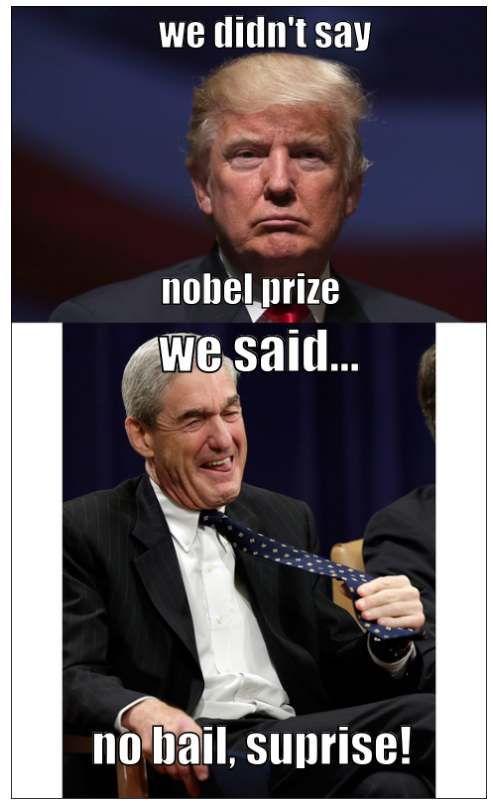

In [185]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/test/")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/test/",imgdir[0]))))

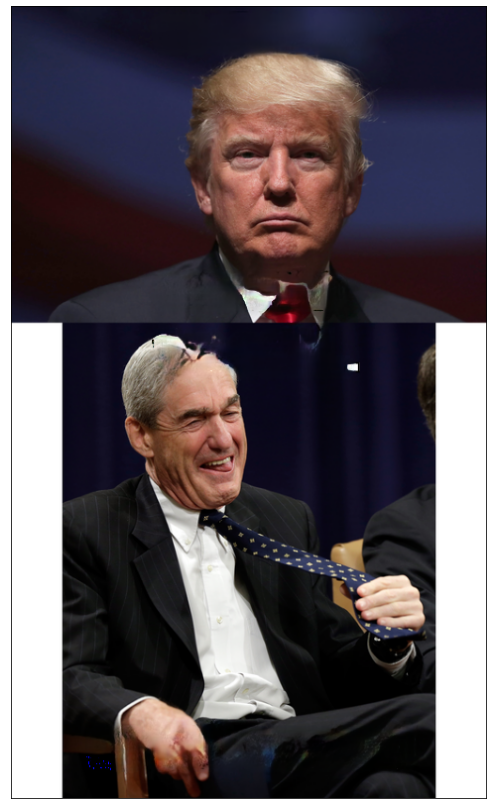

In [189]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/img_clean/")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/img_clean/",imgdir[0]))))

## mmlab-getting mask

In [152]:
os.chdir("/content")

In [153]:
!git clone https://github.com/HimariO/mmdetection-meme.git

Cloning into 'mmdetection-meme'...
remote: Enumerating objects: 13094, done.
remote: Total 13094 (delta 0), reused 0 (delta 0), pack-reused 13094
Receiving objects: 100% (13094/13094), 13.66 MiB | 31.22 MiB/s, done.
Resolving deltas: 100% (8846/8846), done.


In [154]:
!git clone https://github.com/HimariO/HatefulMemesChallenge.git

Cloning into 'HatefulMemesChallenge'...
remote: Enumerating objects: 531, done.
remote: Counting objects: 100% (531/531), done.
remote: Compressing objects: 100% (410/410), done.
remote: Total 531 (delta 115), reused 514 (delta 107), pack-reused 0
Receiving objects: 100% (531/531), 3.05 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [158]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 1.2 MB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


In [171]:
%%bash
python3 /content/HatefulMemesChallenge/data_utils/ocr.py detect \
  /content/data/test

Find 1 images!
0/1


In [164]:
images = glob.glob(os.path.join("/content/data/test", '*.png'))

In [169]:
len(images)

1

In [168]:
images += glob.glob(os.path.join("/content/data/test", '**', '*.png'))


In [170]:
images

['/content/data/test/97261.png']

In [173]:
import pandas as pd
pd.read_json("/content/data/test/ocr.json")

,97261.png
0,"[[[144, 4], [371, 4], [371, 53], [144, 53]], w..."
1,"[[[143, 261], [337, 261], [337, 309], [143, 30..."
2,"[[[145, 319], [335, 319], [335, 381], [145, 38..."
3,"[[[75, 717], [414, 717], [414, 780], [75, 780]..."


In [177]:
%%bash

python3 /content/HatefulMemesChallenge/data_utils/ocr.py point_to_box \
        /content/data/test/ocr.json

In [178]:
import pandas as pd
pd.read_json("/content/data/test/ocr.box.json")

,97261.png
0,"[[144, 4, 371, 53], we didn'I Say, 0.617235168..."
1,"[[143, 261, 337, 309], nobel prize, 0.90088252..."
2,"[[145, 319, 335, 381], we Said:, 0.37194580896..."
3,"[[75, 717, 414, 780], no bail, suprise!, 0.634..."


In [179]:
%%bash

python3 /content/HatefulMemesChallenge/data_utils/ocr.py generate_mask \
        /content/data/test/ocr.box.json \
        /content/data/test \
        /content/data/img_mask_3px

/content/data/img_mask_3px/97261.png
pure_white  2550
pure_white  2244
pure_white  3051
pure_white  4875
slice(0, 800, None) slice(0, 480, None)
[(0, 0), (0, 0), (0, 0)] 0 0
slice(0, 800, None) slice(3, 480, None)
[(0, 0), (0, 3), (0, 0)] 4240128 4223565
slice(0, 800, None) slice(0, 477, None)
[(0, 0), (3, 0), (0, 0)] 3449856 3436380
slice(3, 800, None) slice(0, 480, None)
[(0, 3), (0, 0), (0, 0)] 2601216 2591055
slice(0, 797, None) slice(0, 480, None)
[(3, 0), (0, 0), (0, 0)] 2328576 2319480
slice(3, 800, None) slice(3, 480, None)
[(0, 3), (0, 3), (0, 0)] 3063552 3051585
slice(3, 800, None) slice(0, 477, None)
[(0, 3), (3, 0), (0, 0)] 3032064 3020220
slice(0, 797, None) slice(3, 480, None)
[(3, 0), (0, 3), (0, 0)] 2681856 2671380
slice(0, 797, None) slice(0, 477, None)
[(3, 0), (3, 0), (0, 0)] 2618112 2607885


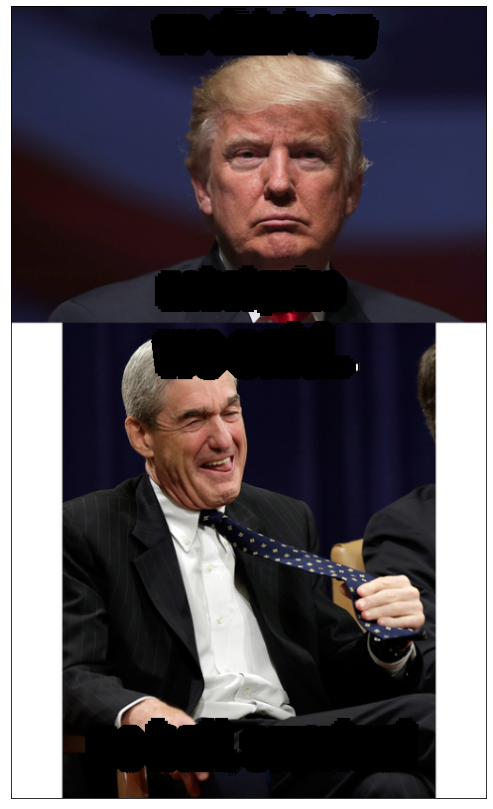

In [182]:
import pandas as pd
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30, 22))  
fig.subplots_adjust(left=0, right=0.5, bottom=0, top=0.5, hspace=0.25, wspace=0.25)

imgdir = os.listdir("/content/data/img_mask_3px/")

ax = fig.add_subplot(1, 1,  1, xticks=[], yticks=[])
ax.imshow(plt.imread((os.path.join("/content/data/img_mask_3px/",imgdir[0]))))

## Inpainting 2

In [148]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/global_local/gl_256x256_8x12_celeba.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/test /content/data/img_clean

Traceback (most recent call last):
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 91, in <module>
    main_dir()
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 57, in main_dir
    args.config, args.checkpoint, device=torch.device('cuda', args.device))
  File "/content/mmediting-meme/mmedit/apis/matting_inference.py", line 30, in init_model
    model = build_model(config.model, test_cfg=config.test_cfg)
  File "/content/mmediting-meme/mmedit/models/builder.py", line 59, in build_model
    return build(cfg, MODELS, dict(train_cfg=train_cfg, test_cfg=test_cfg))
  File "/content/mmediting-meme/mmedit/models/builder.py", line 21, in build
    return build_from_cfg(cfg, registry, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 167, in build_from_cfg
    return obj_cls(**args)
  File "/content/mmediting-meme/mmedit/models/inpaintors/gl_inpaintor.py", line 91, in __init__
    pretrained=pretrained)
  File "/content/mmed

In [149]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py\
    /content/mmediting-meme/configs/inpainting/global_local/gl_256x256_8x12_places.py \
    /content/ckpt/gl_256x256_8x12_places_20200619-52a040a8.pth \
    /content/data/test /content/data/img_clean

Traceback (most recent call last):
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 91, in <module>
    main_dir()
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 57, in main_dir
    args.config, args.checkpoint, device=torch.device('cuda', args.device))
  File "/content/mmediting-meme/mmedit/apis/matting_inference.py", line 30, in init_model
    model = build_model(config.model, test_cfg=config.test_cfg)
  File "/content/mmediting-meme/mmedit/models/builder.py", line 59, in build_model
    return build(cfg, MODELS, dict(train_cfg=train_cfg, test_cfg=test_cfg))
  File "/content/mmediting-meme/mmedit/models/builder.py", line 21, in build
    return build_from_cfg(cfg, registry, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 167, in build_from_cfg
    return obj_cls(**args)
  File "/content/mmediting-meme/mmedit/models/inpaintors/gl_inpaintor.py", line 91, in __init__
    pretrained=pretrained)
  File "/content/mmed

In [92]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py\
    /content/mmediting-meme/configs/inpainting/global_local/gl_256x256_8x12_celeba.py \
    /content/ckpt/gl_256x256_8x12_places_20200619-52a040a8.pth \
    /content/data/test /content/data/img_clean

Traceback (most recent call last):
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 93, in <module>
    main_dir()
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 57, in main_dir
    args.config, args.checkpoint, device=torch.device('cuda', args.device))
  File "/content/mmediting-meme/mmedit/apis/matting_inference.py", line 30, in init_model
    model = build_model(config.model, test_cfg=config.test_cfg)
  File "/content/mmediting-meme/mmedit/models/builder.py", line 59, in build_model
    return build(cfg, MODELS, dict(train_cfg=train_cfg, test_cfg=test_cfg))
  File "/content/mmediting-meme/mmedit/models/builder.py", line 21, in build
    return build_from_cfg(cfg, registry, default_args)
  File "/usr/local/lib/python3.7/dist-packages/mmcv/utils/registry.py", line 167, in build_from_cfg
    return obj_cls(**args)
  File "/content/mmediting-meme/mmedit/models/inpaintors/gl_inpaintor.py", line 91, in __init__
    pretrained=pretrained)
  File "/content/mmed

In [98]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/test/ /content/data/img_clean

[0/1] 97261


Traceback (most recent call last):
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 93, in <module>
    main_dir()
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 75, in main_dir
    mask_path = mask_map[imgid]
KeyError: '97261'


In [97]:
%%bash

python3 /content/mmediting-meme/demo/inpainting_demo.py  \
        /content/mmediting-meme/configs/inpainting/deepfillv2/deepfillv2_256x256_8x2_places.py \
        /content/pretrain_model/deepfillv2_256x256_8x2_places_20200619-10d15793.pth \
        /content/data/hateful_memes/img/ /content/data/img_clean

[0/12130] 62948


Traceback (most recent call last):
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 93, in <module>
    main_dir()
  File "/content/mmediting-meme/demo/inpainting_demo.py", line 75, in main_dir
    mask_path = mask_map[imgid]
KeyError: '62948'
